In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('../Datasets/UCI-heart-disease.csv')
df = pd.DataFrame(data)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   thalach   303 non-null    int64
 6   exang     303 non-null    int64
 7   target    303 non-null    int64
dtypes: int64(8)
memory usage: 19.1 KB


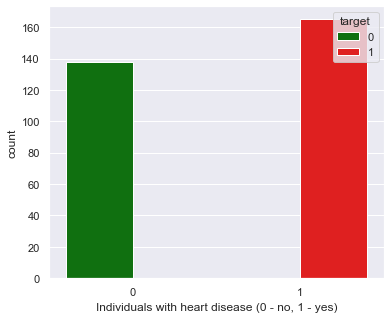

In [12]:
plt.figure(figsize=(6,5)) 
sns.set_theme(style="darkgrid")
sns.countplot(x="target", data=df, hue="target", palette=('green','red'))
plt.xlabel("Individuals with heart disease (0 - no, 1 - yes)")
plt.show()